# Running MEEP Simulations

[MEEP](https://meep.readthedocs.io/) is an open-source FDTD electromagnetic simulator. This notebook demonstrates using the `gsim.meep` API to run an S-parameter simulation on a photonic Y-branch.

**Requirements:**

- UBC PDK: `uv pip install ubcpdk`
- [GDSFactory+](https://gdsfactory.com) account for cloud simulation

### Load a pcell from UBC PDK

2026-02-18 06:12:13.722 | WARNING  | doroutes.pcells:<module>:25 - Cannot determine output type ((D)KCell type)from annotation <class 'kfactory.kcell.DKCell'>. Trying to continue but likely this will fail.
2026-02-18 06:12:13.728 | WARNING  | doroutes.pcells:<module>:48 - Cannot determine output type ((D)KCell type)from annotation <class 'kfactory.kcell.DKCell'>. Trying to continue but likely this will fail.
2026-02-18 06:12:13.729 | WARNING  | doroutes.pcells:<module>:110 - Cannot determine output type ((D)KCell type)from annotation <class 'kfactory.kcell.DKCell'>. Trying to continue but likely this will fail.
2026-02-18 06:12:13.730 | WARNING  | doroutes.pcells:<module>:149 - Cannot determine output type ((D)KCell type)from annotation <class 'kfactory.kcell.DKCell'>. Trying to continue but likely this will fail.
2026-02-18 06:12:13.731 | WARNING  | doroutes.pcells:<module>:168 - Cannot determine output type ((D)KCell type)from annotation <class 'kfactory.kcell.DKCell'>. Trying to con

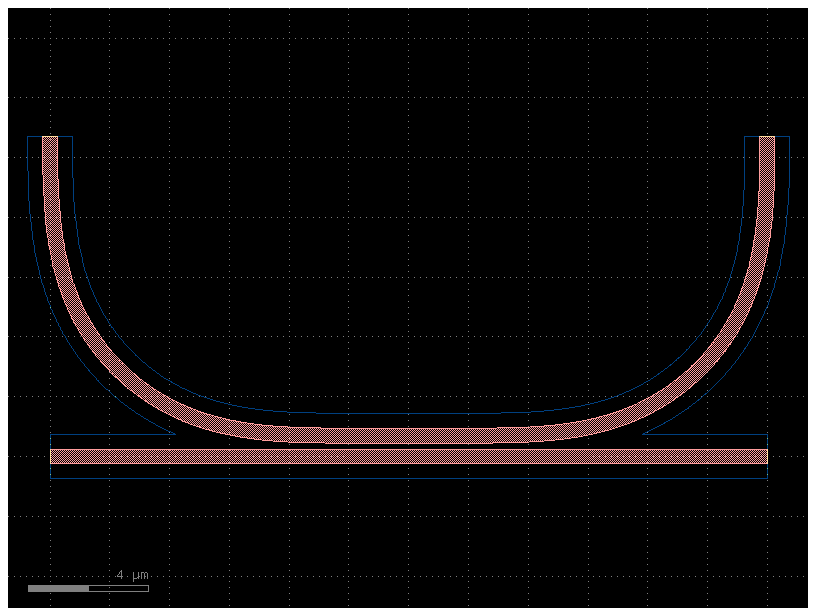

In [1]:
from ubcpdk import PDK, cells

PDK.activate()

c = cells.coupler_ring(gap=0.2)

c

### Configure and run simulation

In [ ]:
from gsim import meep

sim = meep.Simulation()

sim.geometry(component=c, z_crop="auto")
sim.materials = {"si": 3.47, "SiO2": 1.44}
sim.source(port="o1", wavelength=1.55, wavelength_span=0.01, num_freqs=11)
sim.monitors = ["o1", "o2", "o3", "o4"]
sim.domain(pml=1.0, margin=0.5)
sim.solver(resolution=25, save_animation=True, verbose_interval=5.0)
sim.solver.stop_after_sources(time=100)

print(sim.validate_config())

Stack validation: PASSED
Warnings:
  - No stack configured. Will use active PDK with defaults.


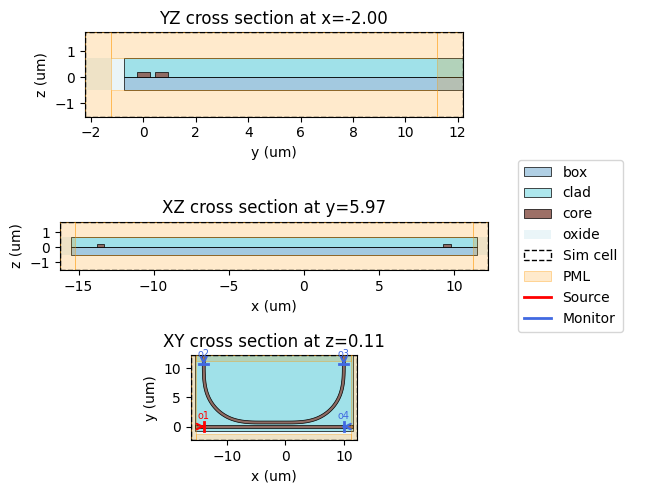

In [3]:
sim.plot_2d(slices="xyz")

### Run simulation on cloud

In [4]:
# Run on GDSFactory+ cloud
result = sim.run()

Uploading simulation... done
Job started: meep-57e3d203
Created: 05:12:16 | Now: 05:31:54 | Status: completed
Extracting results.tar.gz...
Downloaded 362 files to /Users/vahid/doplaydo/gsim/nbs/sim-data-meep-57e3d203/results


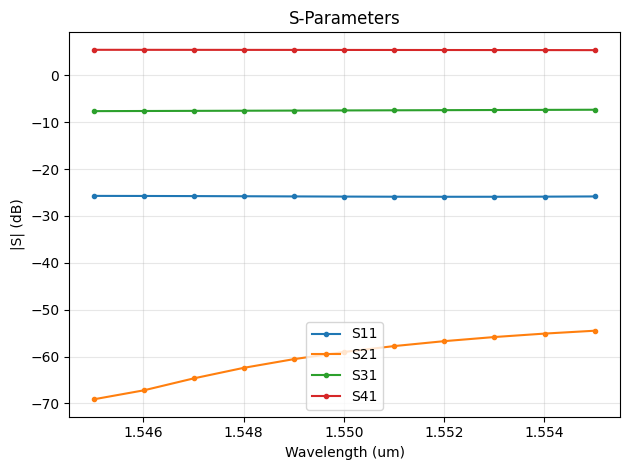

In [5]:
result.plot(db=True)

In [6]:
result.show_animation()